# Final Project

data set from : https://www.kaggle.com/datasets/colearninglounge/gemstone-price-prediction?select=cubic_zirconia.csv

## Data Exploration

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df_raw = pd.read_csv('cubic_zirconia.csv')

In [26]:
df_raw.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [27]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [28]:
df_raw.shape

(26967, 11)

In [29]:
di = df_raw.shape
print('Rows : ' + str(di[0]))
print('Columns : ' + str(di[1]))

Rows : 26967
Columns : 11


In [30]:
df_raw.describe(include=['object'])

,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


In [31]:
df_raw.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [32]:
x = 100*(31.8*2/(10.23+58.9))
print(x)

92.00057861999133


In [33]:
df_raw.drop(df_raw.columns[0],axis=1, inplace=True)
df_raw.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


Categorical Feature

In [34]:
categorical_features = ['cut','color','clarity']

In [35]:
df_raw[categorical_features].head()

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1


In [36]:
p = 1
for col in df_raw.select_dtypes(include='object').columns:
    print(str(p) + '.' + col + ' are ' + str(len(df_raw[col].unique())) + ' categories ', end = '')
    print(df_raw[col].unique())
    p+=1

1.cut are 5 categories ['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
2.color are 7 categories ['E' 'G' 'F' 'D' 'H' 'J' 'I']
3.clarity are 8 categories ['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']


Explain Features
1. cut คือ คุณภาพหลังการเจียระไน
2. color คือ สีของ cubic zirconia โดยเรียงจาก D-J (best-worst)
3. clarity คือ ความสะอาดของเพชร มีลำดับการเรียงจากสะอาดมากไปสะอาดน้อยดังนี้ IF VVS1 VVS2 VS1 VS2 SI1 SI2 I1

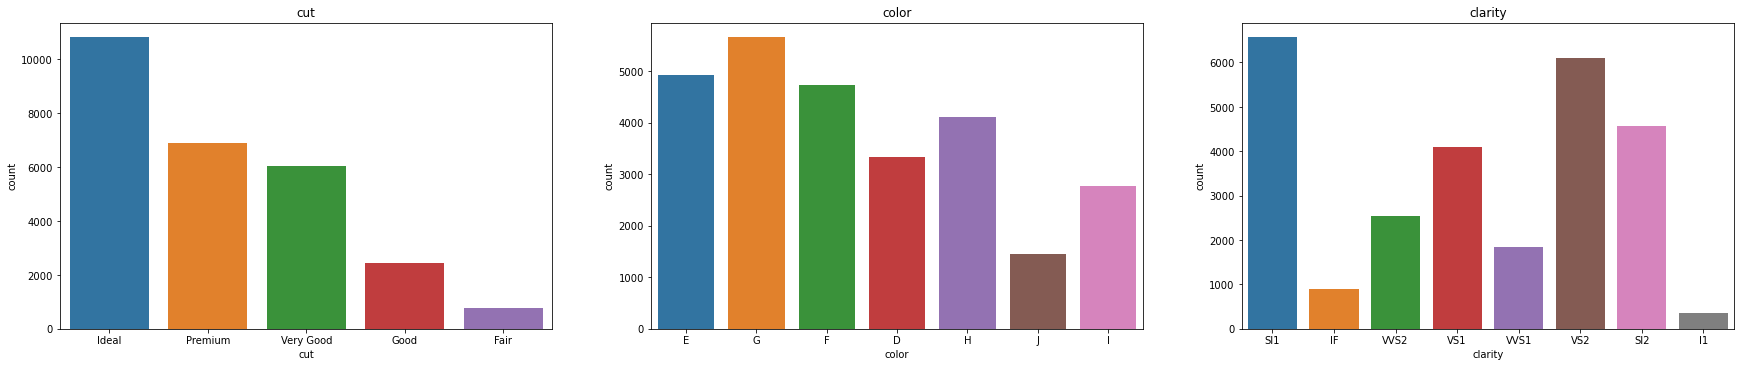

In [37]:
plt.figure(figsize=(30,80), facecolor='white')
plotnumber =1
for c in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(x=c,data=df_raw)
    plt.xlabel(c)
    plt.title(c)
    
    plotnumber+=1
plt.show()

In [38]:
print('cut\n',df_raw.cut.value_counts())
print('color\n',df_raw.color.value_counts())
print('clarity\n',df_raw.clarity.value_counts())

cut
 Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64
color
 G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64
clarity
 SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64


Numerical Feature

In [39]:
numerical_features = ['carat','depth','table','x','y','z','price']

In [40]:
df_raw[numerical_features].head()

,carat,depth,table,x,y,z,price
0,0.30,62.1,58.0,4.27,4.29,2.66,499
1,0.33,60.8,58.0,4.42,4.46,2.70,984
2,0.90,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,60.4,59.0,4.35,4.43,2.65,779


Explain Features
1. carat คือ หน่วยในการวัดระดับของน้ำหนักอัญมณีต่างๆ 1 carat = 0.2 g 
2. depth คือ อัตราส่วนของความสูงเทียบกับความกว้าง (%)
3. table คือ ความกว้างของยอดเพชรคิดจากเส้นผ่านศูนย์กลางเฉลี่ย (%)
4. x คือ ความยาว (mm)
5. y คือ ความกว้าง (mm)
6. z คือ ความสูง (mm)
7. price คือ ราคา

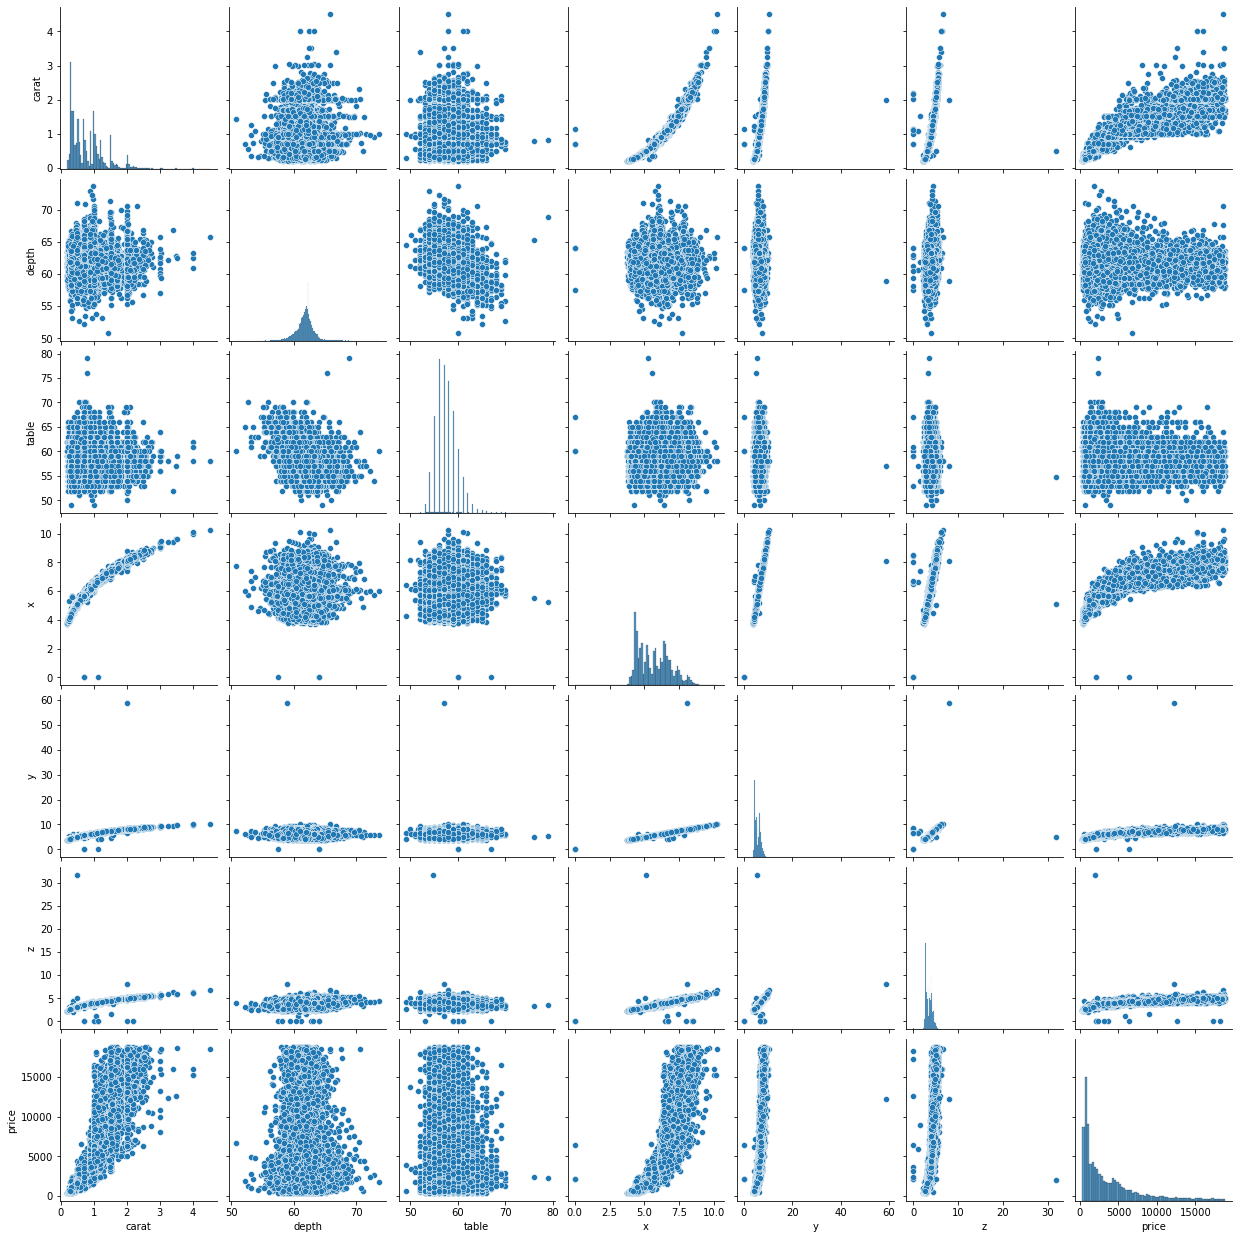

In [41]:
sns.pairplot(df_raw)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\si

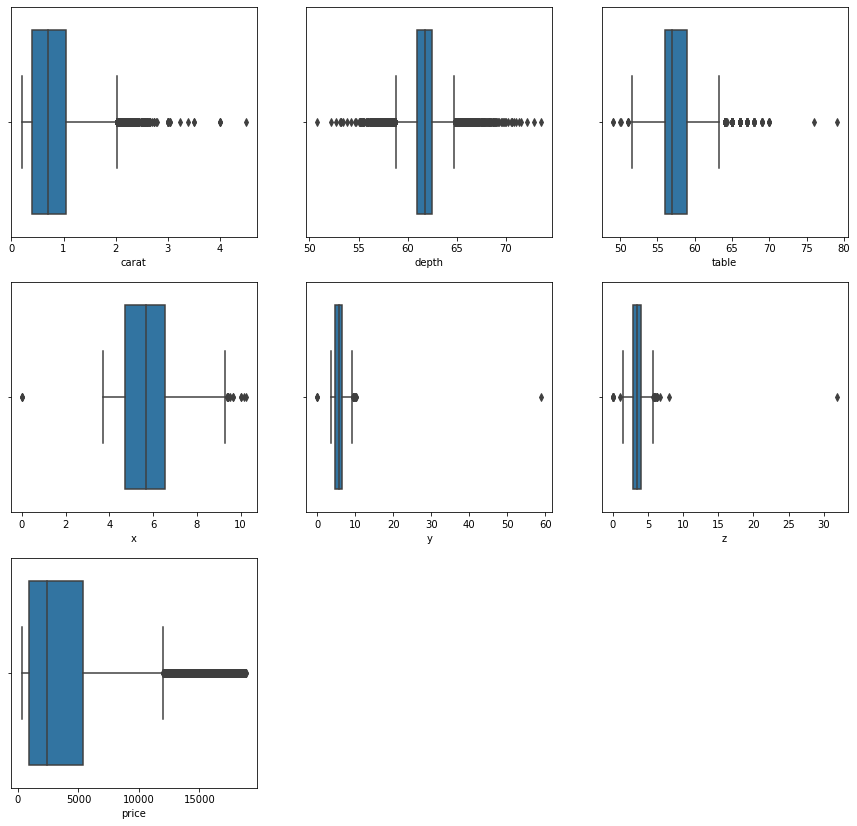

In [42]:
plt.figure(figsize=(15,60), facecolor='white')
plotnumber =1
for feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df_raw[feature],whis=1.5)
    # sns.boxplot(x='Attrition_Flag', y= df_raw[feature], data=df_raw)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

<AxesSubplot:>

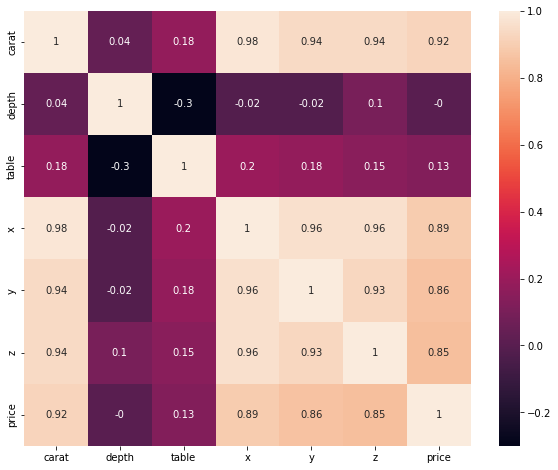

In [43]:
cormat = df_raw.corr()
# round(cormat,2)

plt.figure(figsize=(10,8))
sns.heatmap(cormat.round(2), annot = True)

Categorical and Numerical

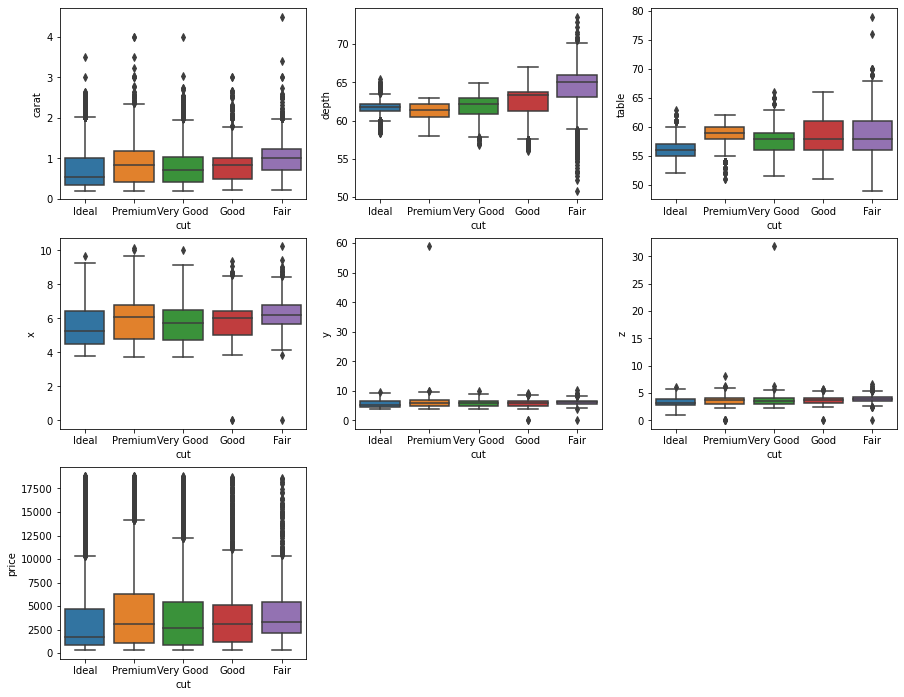

In [44]:
plt.figure(figsize=(15,50), facecolor='white')
plotnumber =1
for feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x='cut', y= df_raw[feature], data=df_raw)
    plt.xlabel('cut')
    plotnumber+=1
plt.show()

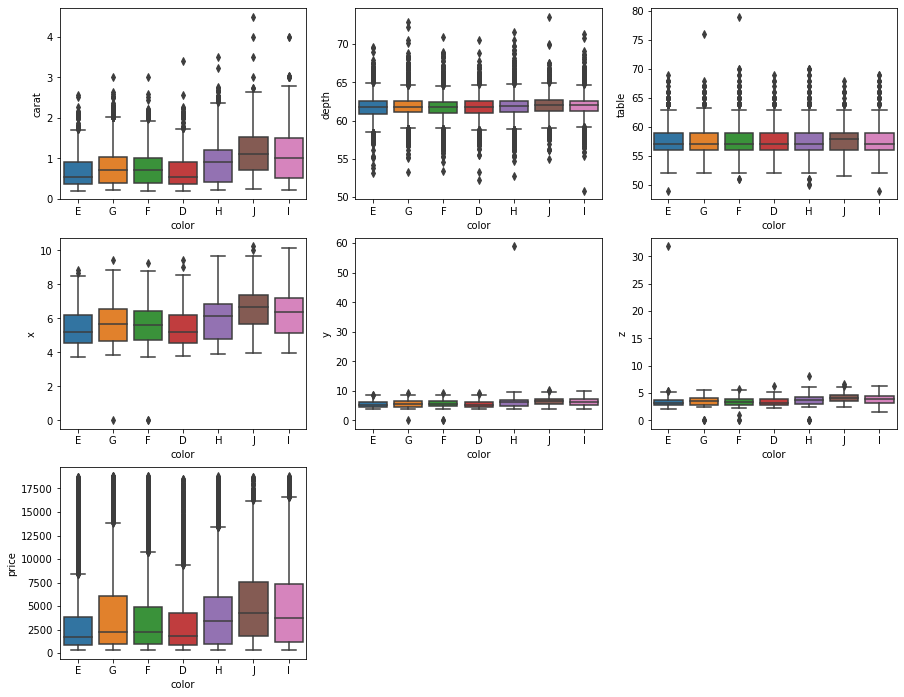

In [45]:
plt.figure(figsize=(15,50), facecolor='white')
plotnumber =1
for feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x='color', y= df_raw[feature], data=df_raw)
    plt.xlabel('color')
    plotnumber+=1
plt.show()

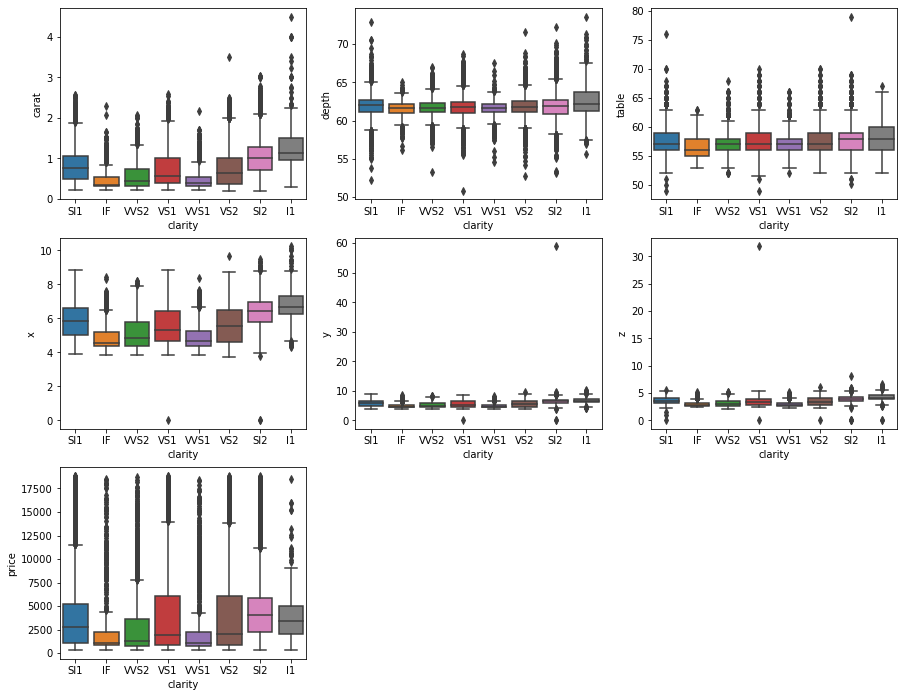

In [46]:
plt.figure(figsize=(15,50), facecolor='white')
plotnumber =1
for feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x='clarity', y= df_raw[feature], data=df_raw)
    plt.xlabel('clarity')
    plotnumber+=1
plt.show()

Insight of data

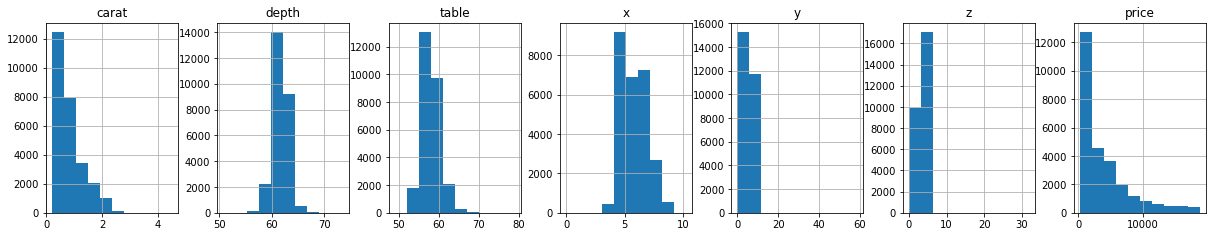

In [47]:
df_raw.hist(layout = (1,len(df_raw.columns)),figsize=(3*len(df_raw.columns),3.5));
# df_raw[cols].hist(layout = (1,len(cols)),figsize=(3*len(cols),3.5));


In [48]:
at = pd.DataFrame(df_raw['z']/( (df_raw['x'] + df_raw['y'])/2)*100 ,columns=['cal_depth'])
compare = pd.DataFrame([at['cal_depth'],df_raw['depth']]).T
compare.head()

,cal_depth,depth
0,62.149533,62.1
1,60.810811,60.8
2,62.171053,62.2
3,61.538462,61.6
4,60.364465,60.4


<AxesSubplot:xlabel='depth', ylabel='Count'>

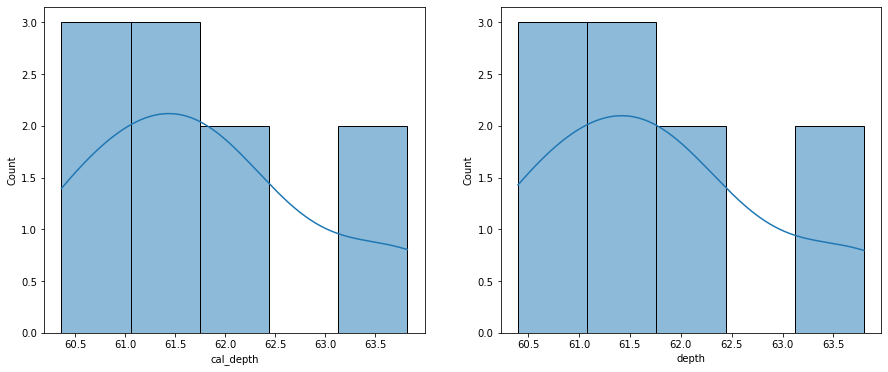

In [49]:
fig, ax = plt.subplots(ncols=2,figsize = (15,6))
ax = ax.ravel()

sns.histplot(data=at.head(10), x="cal_depth", kde=True, ax=ax[0])
sns.histplot(data=df_raw.head(10), x="depth", kde=True, ax=ax[1])

<AxesSubplot:xlabel='cut', ylabel='table'>

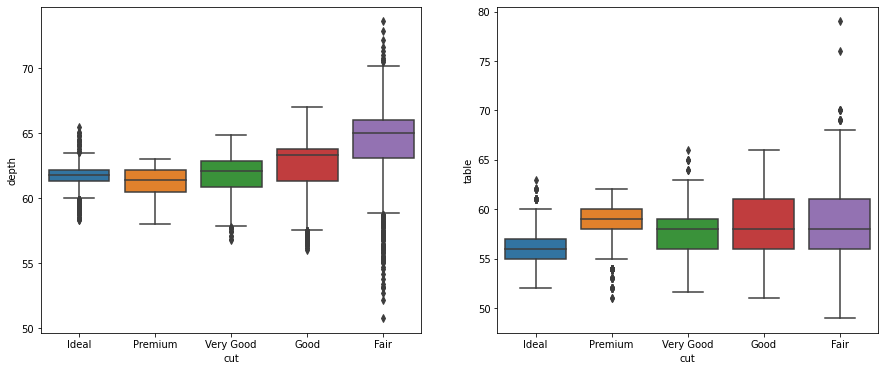

In [50]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize = (15,6))
ax = ax.ravel()
sns.boxplot(x='cut', y= df_raw['depth'], data=df_raw, ax=ax[0])
sns.boxplot(x='cut', y= df_raw['table'], data=df_raw, ax=ax[1])
# plt.show()



## Data Preprocessing

In [51]:
df_pre = df_raw.copy()

Missing Values

In [52]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [53]:
df_pre = df_pre.dropna(axis = 0, how ='any')

In [54]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26270 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26270 non-null  float64
 1   cut      26270 non-null  object 
 2   color    26270 non-null  object 
 3   clarity  26270 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26270 non-null  float64
 6   x        26270 non-null  float64
 7   y        26270 non-null  float64
 8   z        26270 non-null  float64
 9   price    26270 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.2+ MB


In [55]:
print("Old data frame length:", len(df_raw), "\nNew data frame length:", 
       len(df_pre), "\nNumber of rows with at least 1 NA value: ",
       (len(df_raw)-len(df_pre)))

Old data frame length: 26967 
New data frame length: 26270 
Number of rows with at least 1 NA value:  697


Duplicate Values

In [56]:
df_pre.duplicated().sum()

34

In [57]:
df_pre.drop_duplicates(inplace=True)

In [58]:
df_pre.duplicated().sum()

0

Outlier

In [59]:
df_pre.describe()

,carat,depth,table,x,y,z,price
count,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000
mean,0.797620,61.745285,57.455877,5.728646,5.732487,3.536339,3935.926818
std,0.476691,1.412243,2.230866,1.126332,1.165283,0.698608,4019.809223
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2374.000000
75%,1.050000,62.500000,59.000000,6.540000,6.540000,4.040000,5356.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,8.060000,18818.000000


- x, y, z ที่มีค่าเป็น 0 เป็น outlier

In [60]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [61]:
for i in ['x', 'y', 'z']:
    lr,ur=remove_outlier(df_pre[i])
    # print(lr,ur)
    df_pre=df_pre[(df_pre[i]>(lr)) & (df_pre[i]<ur)]

In [62]:
df_pre.shape

(26210, 10)

In [63]:
# avg = (9.25+9.2)/2
# print((5.73/avg)*100)

In [64]:
df_pre.describe()

,carat,depth,table,x,y,z,price
count,26210.000000,26210.000000,26210.000000,26210.000000,26210.000000,26210.000000,26210.000000
mean,0.795785,61.745395,57.454384,5.726231,5.728190,3.535882,3926.928997
std,0.472158,1.410740,2.229595,1.121290,1.113267,0.692931,4007.898599
min,0.200000,50.800000,49.000000,3.730000,3.710000,1.530000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2369.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5345.000000
max,3.010000,73.600000,79.000000,9.250000,9.200000,5.730000,18818.000000


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\si

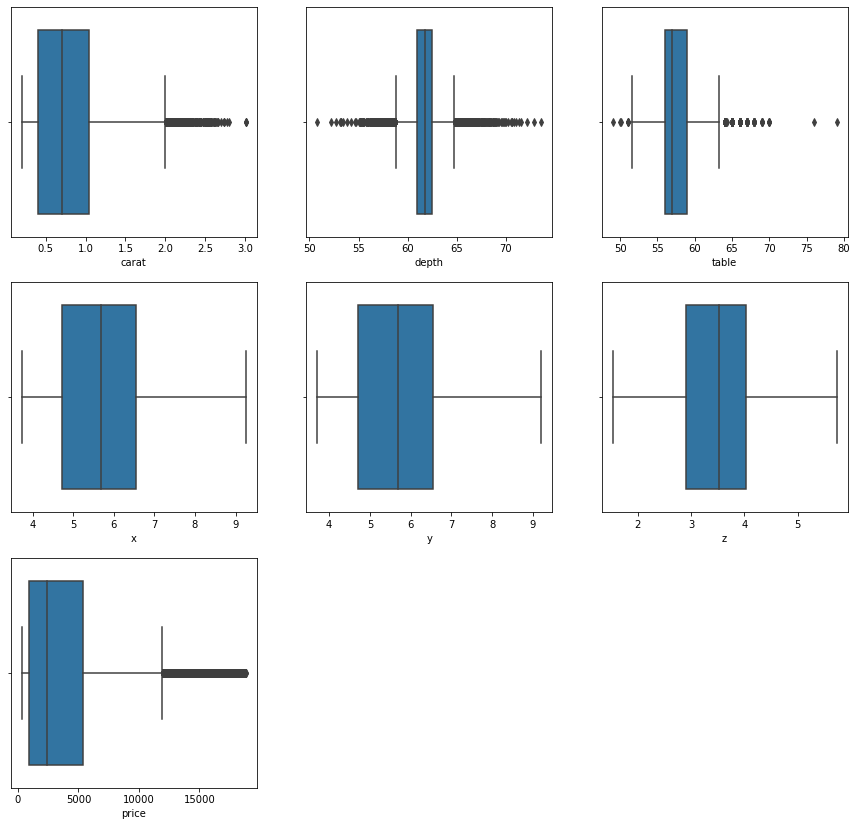

In [65]:
plt.figure(figsize=(15,60), facecolor='white')
plotnumber =1
for feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df_pre[feature],whis=1.5)
    # sns.boxplot(x='Attrition_Flag', y= df_raw[feature], data=df_raw)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

Feature Selection

เลือกใช้ 
- depth
- table
- carat
- cut
- color
- clarity

In [66]:
y = df_pre['price']

In [67]:
cut_cols = ['x', 'y', 'z']
df_pre.drop(cut_cols,axis=1, inplace=True)

In [68]:
df_pre.shape

(26210, 7)

Feature Extraction

In [69]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [70]:
feas = ['carat', 'cut', 'color', 'clarity', 'depth', 'table']

In [71]:
onehot_en = pd.get_dummies(df_pre)
# onehot_en

In [72]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(onehot_en)

In [73]:
# X = pd.DataFrame(X,columns= list(onehot_en.columns))
# X.head()

In [74]:
df_new = df_pre.copy()

In [75]:
# Assigning dummies
df_new['cut']       =   df_new['cut'].map({'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5})
df_new['color']     =   df_new['color'].map({'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1})
df_new['clarity']   =   df_new['clarity'].map({'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8})
df_new['cut']       =   df_new['cut'].astype(int)
df_new['color']     =   df_new['color'].astype(int)
df_new['clarity']   =   df_new['clarity'].astype(int)

In [110]:
df_new.head(30)

,carat,cut,color,clarity,depth,table,price
0,0.30,5,6,3,62.1,58.0,499
1,0.33,4,4,8,60.8,58.0,984
2,0.90,3,6,6,62.2,60.0,6289
3,0.42,5,5,5,61.6,56.0,1082
4,0.31,5,5,7,60.4,59.0,779
5,1.02,5,7,4,61.5,56.0,9502
6,1.01,2,3,3,63.7,60.0,4836
7,0.50,4,6,3,61.5,62.0,1415
8,1.21,2,3,3,63.8,64.0,5407
9,0.35,5,5,4,60.5,57.0,706


In [113]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_new)

In [78]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(df_pre)

In [79]:
df_pre.head()

,carat,cut,color,clarity,depth,table,price
0,0.30,Ideal,E,SI1,62.1,58.0,499
1,0.33,Premium,G,IF,60.8,58.0,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6289
3,0.42,Ideal,F,VS1,61.6,56.0,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,779


## K-Mean Clustering

In [80]:
from sklearn.cluster import KMeans

In [81]:
# df_Km = X.copy()

In [82]:
ssd = []
for i in range(2,10):
    m = KMeans(n_clusters=i)
    m.fit(X)
    ssd.append([i,m.inertia_])
for j,k in ssd:
    print('Cluster : {} Scores : {}'.format(j,k))

Cluster : 2 Scores : 6063.976849899289
Cluster : 3 Scores : 4918.975212683553
Cluster : 4 Scores : 4175.853930998741
Cluster : 5 Scores : 3633.827427778164
Cluster : 6 Scores : 3243.2951511521883
Cluster : 7 Scores : 3016.7170424749993
Cluster : 8 Scores : 2814.6585554721337
Cluster : 9 Scores : 2664.153251030939


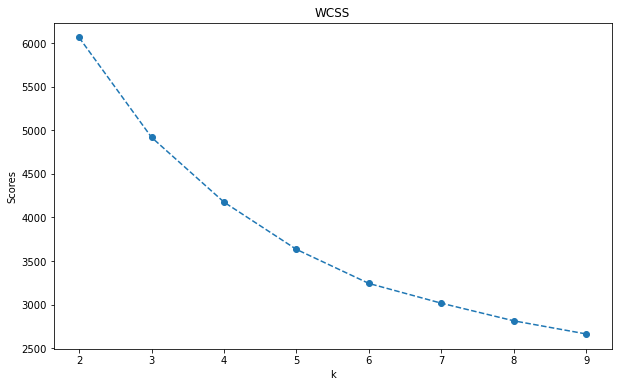

In [83]:
xy = np.array(ssd)
plt.figure(figsize=(10,6))
plt.plot(xy[:,0],xy[:,1],linestyle ='--',marker='o')
plt.title('WCSS')
plt.ylabel('Scores')
plt.xlabel('k');

Silhouette Score

In [84]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [85]:
def sil_score(x, start, end):
    sils = []
    for k in range(start,end+1):
        m = KMeans(n_clusters=k)
        m.fit(x)
        silhouette_avg = silhouette_score(x, m.labels_).round(4)
        sils.append([silhouette_avg, k])
        
    return sils

In [86]:
ss = sil_score(X,2,7)
print(f'score = {ss}')

score = [[0.2263, 2], [0.2377, 3], [0.2217, 4], [0.229, 5], [0.234, 6], [0.2369, 7]]


Clustering

In [87]:
K_model = KMeans(n_clusters=5)

In [88]:
K_model.fit(X)

# K_model.cluster_centers_

KMeans(n_clusters=5)

In [89]:
K_model.labels_

array([2, 4, 1, ..., 2, 4, 3])

In [90]:
df_Km = pd.DataFrame(X,columns= list(df_pre.columns))
df_Km.head()

,carat,cut,color,clarity,depth,table,price
0,0.035587,1.00,0.833333,0.285714,0.495614,0.300000,0.009355
1,0.046263,0.75,0.500000,1.000000,0.438596,0.300000,0.035583
2,0.249110,0.50,0.833333,0.714286,0.500000,0.366667,0.322464
3,0.078292,1.00,0.666667,0.571429,0.473684,0.233333,0.040883
4,0.039146,1.00,0.666667,0.857143,0.421053,0.333333,0.024497


In [91]:
df_Km['Cluster'] = K_model.labels_
df_Km.head()

,carat,cut,color,clarity,depth,table,price,Cluster
0,0.035587,1.00,0.833333,0.285714,0.495614,0.300000,0.009355,2
1,0.046263,0.75,0.500000,1.000000,0.438596,0.300000,0.035583,4
2,0.249110,0.50,0.833333,0.714286,0.500000,0.366667,0.322464,1
3,0.078292,1.00,0.666667,0.571429,0.473684,0.233333,0.040883,4
4,0.039146,1.00,0.666667,0.857143,0.421053,0.333333,0.024497,4


<AxesSubplot:xlabel='Cluster', ylabel='count'>

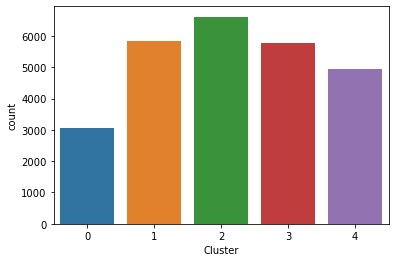

In [92]:
sns.countplot(x='Cluster',data=df_Km)

In [93]:
cols = ['carat', 'cut', 'color', 'clarity', 'depth', 'table','price']
cols

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price']

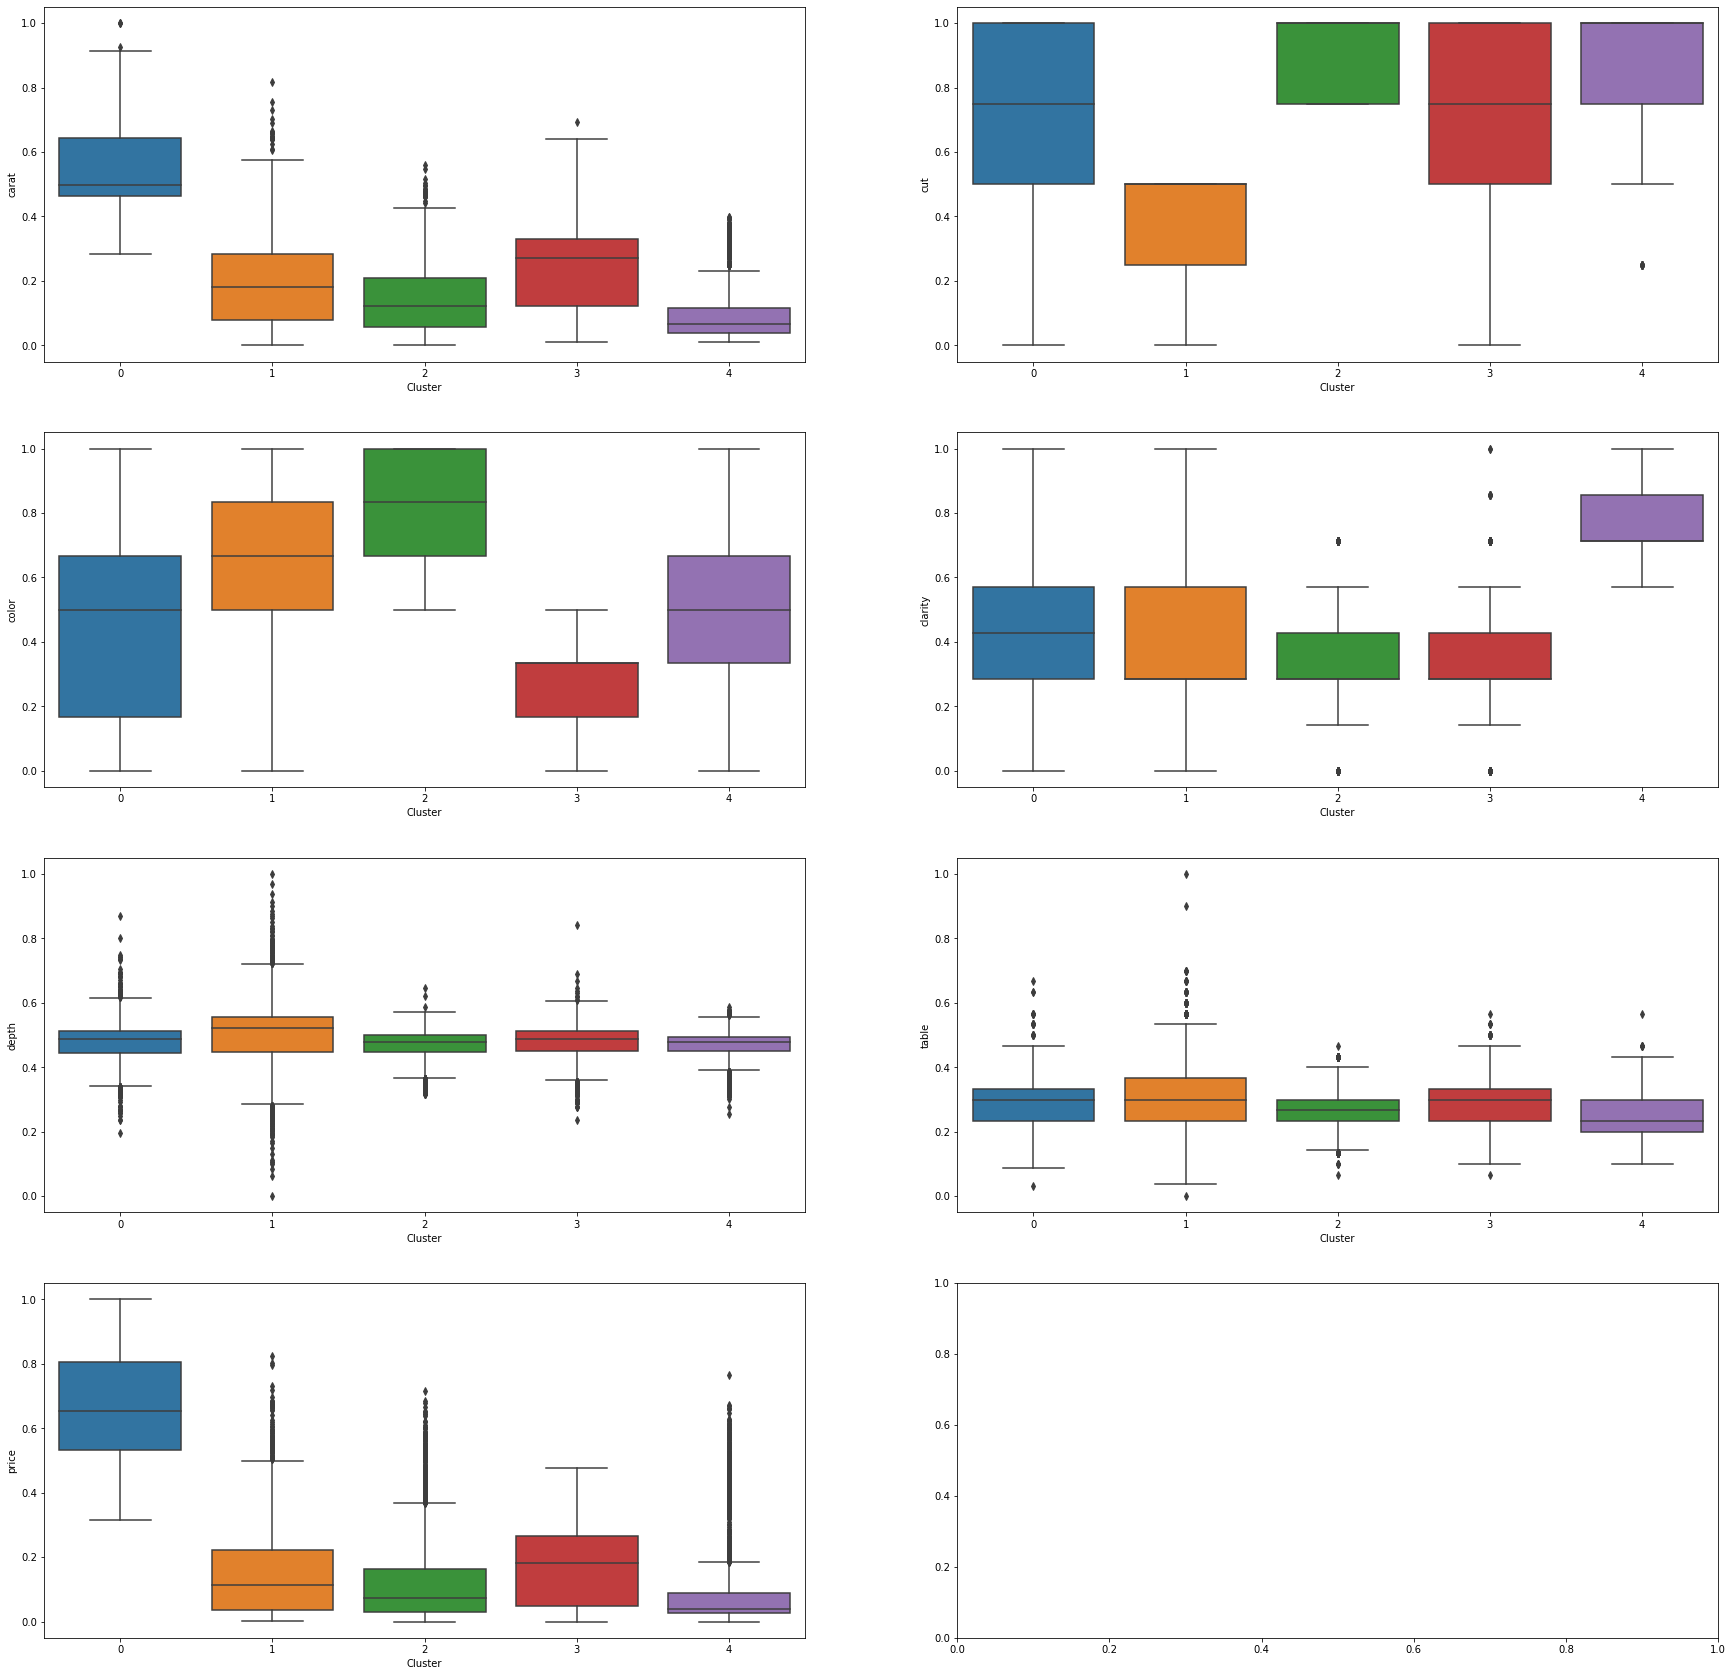

In [94]:
fig, ax = plt.subplots(nrows=4,ncols=2,figsize = (30,30))
ax = ax.ravel()
for i, col in enumerate(cols):
    sns.boxplot(x = 'Cluster',y=col,data = df_Km,ax = ax[i])

In [95]:
# df_Km['price'] = y
# df_Km

<AxesSubplot:xlabel='Cluster', ylabel='price'>

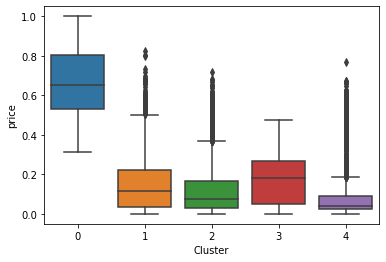

In [96]:
sns.boxplot(x = 'Cluster',y='price',data = df_Km)

In [97]:
cols = ['carat', 'cut', 'color', 'clarity', 'depth', 'table','price']
df_Km

,carat,cut,color,clarity,depth,table,price,Cluster
0,0.035587,1.00,0.833333,0.285714,0.495614,0.300000,0.009355,2
1,0.046263,0.75,0.500000,1.000000,0.438596,0.300000,0.035583,4
2,0.249110,0.50,0.833333,0.714286,0.500000,0.366667,0.322464,1
3,0.078292,1.00,0.666667,0.571429,0.473684,0.233333,0.040883,4
4,0.039146,1.00,0.666667,0.857143,0.421053,0.333333,0.024497,4
...,...,...,...,...,...,...,...,...
26205,0.323843,0.75,0.500000,0.285714,0.504386,0.300000,0.274822,3
26206,0.046263,1.00,0.333333,1.000000,0.486842,0.200000,0.042613,4
26207,0.110320,0.75,0.833333,0.428571,0.478070,0.300000,0.071923,2
26208,0.024911,0.50,0.666667,0.714286,0.482456,0.233333,0.019252,4


Text(0, 0.5, 'table')

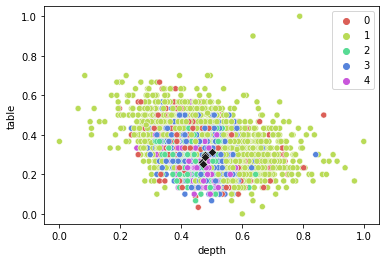

In [98]:
sns.scatterplot(x=df_Km['depth'], y=df_Km['table'], 
                        data=df_Km,hue=K_model.labels_,alpha=1,palette=sns.color_palette('hls', K_model.n_clusters));
sns.scatterplot(x=K_model.cluster_centers_[:,4],y=K_model.cluster_centers_[:,5],
                        data=K_model.cluster_centers_,color = '.1',marker='D');

plt.xlabel('depth')
plt.ylabel('table')

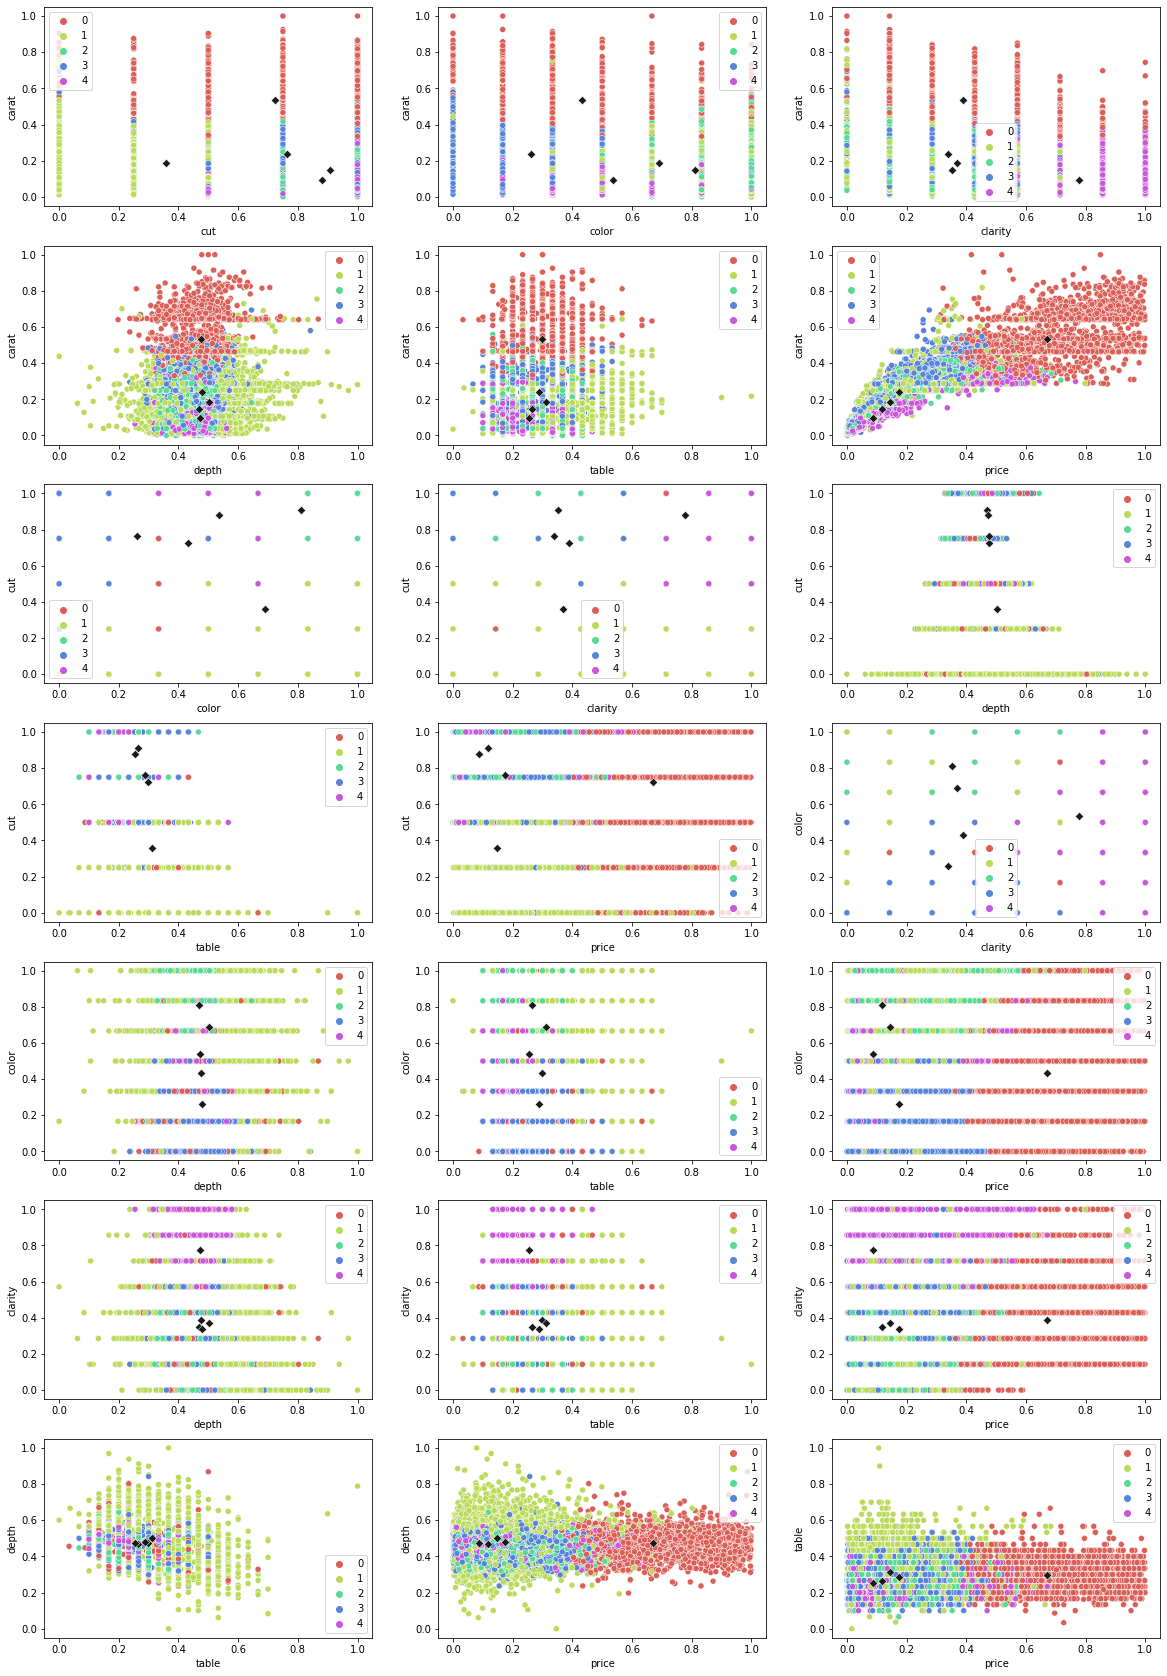

In [99]:
fig, ax = plt.subplots(nrows=7,ncols=3,figsize = (20,30))
ax = ax.ravel()
c = 0
for n in range(df_Km.shape[1]-1):
    for k in range(n+1,df_Km.shape[1]-1):
        sns.scatterplot(x=df_Km[cols[k]], y=df_Km[cols[n]], 
                        data=df_Km,hue=K_model.labels_,alpha=1,palette=sns.color_palette('hls', K_model.n_clusters),ax=ax[c]);
        sns.scatterplot(x=K_model.cluster_centers_[:,k],y=K_model.cluster_centers_[:,n],
                        data=K_model.cluster_centers_,color = '.1',marker='D',ax=ax[c]);
        # plt.legend(title='Cluster')
        plt.xlabel(cols[k])
        plt.ylabel(cols[n])
        c+=1

## Train Model

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [101]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

# print("X_train shape", X_train.shape)
# print("y_train shape", y_train.shape)
# print("X_test shape", X_test.shape)
# print("y_test shape", y_test.shape)

In [102]:
md_linear = LinearRegression()
md_linear.fit(X,y)

LinearRegression()

In [103]:
md_linear.score(X,y)

1.0

In [104]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [105]:
# #Predict on training set
# y_pred_train = md_linear.predict(X_train)
# # y_pred
# y_pred_test = md_linear.predict(X_test)

In [106]:
# y_pred_train

In [107]:
y_pred = md_linear.predict(X)

In [108]:
df = df_pre.copy()
df['price'] = y
# df['predict price'] = y_pred
# # df = pd.DataFrame(y_pred,columns=['predict price'])
# df.head(20)


dc = pd.concat([df.reset_index(), pd.Series(y_pred,name='predict price')],axis='columns')
dc

,index,carat,cut,color,clarity,depth,table,price,predict price
0,0,0.30,Ideal,E,SI1,62.1,58.0,499,499.0
1,1,0.33,Premium,G,IF,60.8,58.0,984,984.0
2,2,0.90,Very Good,E,VVS2,62.2,60.0,6289,6289.0
3,3,0.42,Ideal,F,VS1,61.6,56.0,1082,1082.0
4,4,0.31,Ideal,F,VVS1,60.4,59.0,779,779.0
...,...,...,...,...,...,...,...,...,...
26205,26962,1.11,Premium,G,SI1,62.3,58.0,5408,5408.0
26206,26963,0.33,Ideal,H,IF,61.9,55.0,1114,1114.0
26207,26964,0.51,Premium,E,VS2,61.7,58.0,1656,1656.0
26208,26965,0.27,Very Good,F,VVS2,61.8,56.0,682,682.0
